Karol Wesołowski, 148116, inf sem 4 grupa I2.2

#Wprowadzenie
Zbiór danych przedstawia wartość GDI (Gender Development Index), czyli różnicę między poziomem życia kobiet i mężczyzn w danych krajach. Dane pochodzą z 2019 i zostały zebrane w ramach obserwacji przez Organizację Narodów Zjednoczonych. Zbiór został rozpisany na wszytskie 189 krajów uznawanych przez ONZ, lecz 22 z nich nie posiadają kompletu danych. Mimo to można uznać, że reprezentują one całą populację.

Zbiór jest złożony z czternastu kolumn. Pierwsza jest pozycją rankingową pod względem wartości HDI, druga nazwą kraju, którego dotyczą dane. Kolejne dwie zawierają informację o wartości współczynnika GDI oraz o grupie, do której państwo zostało zaliczone. Grupy oznaczono liczbami całkowitymi od 1 do 5, gdzie 1 jest grupą najlepszą. Pozostałe dziesięć kolum reprezentuje poszczególne wartości użyte przy obliczaniu GDI, ustawione w pary, odpowiednio dla kobiet i mężczyzn. Wartości te to:
1. HDI - wskaźnik rozwoju społecznego
2. Spodziewana długość życia (w latach)
3. Oczekiwana (zakładana) długość edukacji (w latach)
4. Faktyczna, uśredniona długość edukacji (w latach)
5. Przychód krajowy na osobę (w dolarach amerykańskich)

Dane są zapisane jako ciągi znaków, w przypadku dużych liczb zastosowano separator tysięczy w postaci przecinka (',').

Różnica między wartością HDI kobiet i mężczyzn służy do wyznaczenia wartości współczynnika GDI. 1 oznacza równowagę, wartości większe oznaczają wyższy standard życia kobiet.

Dane uzyskane ze strony Kaggle -> https://www.kaggle.com/datasets/elmartini/gender-development-index-2019

In [ ]:
#przygotowanie środowiska
install.packages("epiDisplay")
install.packages("cowplot")
install.packages("moments")
library(tidyverse)
library(epiDisplay)
library(cowplot)
library(moments)
defaultW <- getOption("warn") 
options(warn = -1) 

In [ ]:
#Przygotowanie danych
Dane <- read_csv("/content/GDI.csv")
names(Dane) <- make.names(names(Dane), unique=TRUE)
Dane <- Dane[-c(1),] #usunięto pierwszy wers, w którym autor zbioru umieścił jedną wartość '2019' wskazującą rok badania
Dane

Rows: 190 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): Country, GDI_Value, GDI_Group, HDI_Female, HDI_Male, Lif_Expec_Fem...
dbl  (1): HDI Rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


HDI.Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
2,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
4,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
6,Germany,0.972,2,0.933,0.960,83.7,78.9,16.9,17.0,13.9,14.4,"45,277","65,599"
7,Sweden,0.983,1,0.936,0.953,84.6,81.0,20.4,18.6,12.7,12.4,"47,709","61,287"
8,Australia,0.976,1,0.932,0.955,85.4,81.5,22.4,21.5,12.8,12.7,"39,287","56,954"
8,Netherlands,0.966,2,0.926,0.960,84.0,80.6,18.8,18.2,12.2,12.7,"46,815","68,685"


#Histogramy
Histogramy przedstawiają lata nauki szkolnej. W wierszach zastosowano podział na płeć, w kolumnach odpowiednio wartości faktyczne uśrednione i wartości oczekiwane

Średnia z uśrednionego czasu nauki kobiet:  8.482759 
Średnia ze spodziewanego czasu nauki kobiet:  13.49889 
Średnia z uśrednionego czasu nauki mężczyzn:  9.131034 
Średnia ze spodziewanego czasu nauki mężczyzn:  13.28111 

Mediana z uśrednionego czasu nauki kobiet:  9.1 
Mediana ze spodziewanego czasu nauki kobiet:  13.85 
Mediana z uśrednionego czasu nauki mężczyzn:  9.25 
Mediana ze spodziewanego czasu nauki mężczyzn:  13.3 


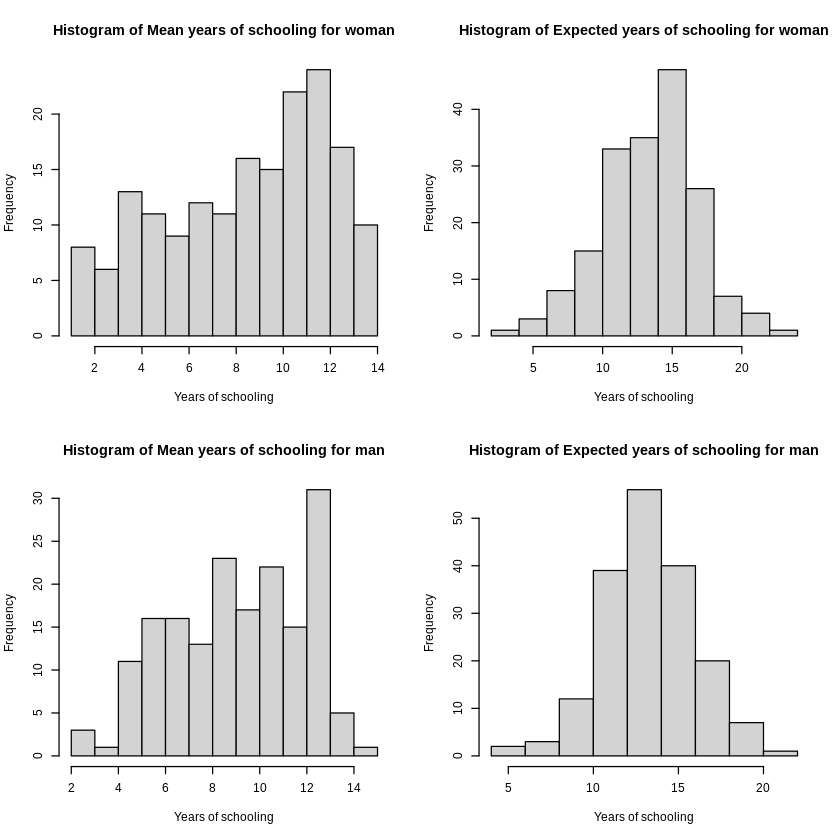

In [ ]:
par(mfrow=c(2,2), cex=0.6)
p1 <- hist(as.numeric(Dane$Mean_Yrs_Schooling_Female),nclass = 10, main = "Histogram of Mean years of schooling for woman", xlab = "Years of schooling")
p2<- hist(as.numeric(Dane$Excep_Yrs_Schooling_Female),nclass = 10, main = "Histogram of Expected years of schooling for woman", xlab = "Years of schooling")
p3<- hist(as.numeric(Dane$Mean_Yrs_Schooling_Male),nclass = 10, main = "Histogram of Mean years of schooling for man", xlab = "Years of schooling")
p4<- hist(as.numeric(Dane$Excep_Yrs_Schooling_Male),nclass = 10, main = "Histogram of Expected years of schooling for man", xlab = "Years of schooling")
cat("Średnia z uśrednionego czasu nauki kobiet: ",mean(as.numeric(Dane$Mean_Yrs_Schooling_Female), na.rm=T),"\n")
cat("Średnia ze spodziewanego czasu nauki kobiet: ",mean(as.numeric(Dane$Excep_Yrs_Schooling_Female), na.rm=T),"\n")
cat("Średnia z uśrednionego czasu nauki mężczyzn: ",mean(as.numeric(Dane$Mean_Yrs_Schooling_Male), na.rm=T),"\n")
cat("Średnia ze spodziewanego czasu nauki mężczyzn: ",mean(as.numeric(Dane$Excep_Yrs_Schooling_Male), na.rm=T),"\n\n")

cat("Mediana z uśrednionego czasu nauki kobiet: ",median(as.numeric(Dane$Mean_Yrs_Schooling_Female), na.rm=T),"\n")
cat("Mediana ze spodziewanego czasu nauki kobiet: ",median(as.numeric(Dane$Excep_Yrs_Schooling_Female), na.rm=T),"\n")
cat("Mediana z uśrednionego czasu nauki mężczyzn: ",median(as.numeric(Dane$Mean_Yrs_Schooling_Male), na.rm=T),"\n")
cat("Mediana ze spodziewanego czasu nauki mężczyzn: ",median(as.numeric(Dane$Excep_Yrs_Schooling_Male), na.rm=T),"\n")

**Wnioski** 

Według założeń, kobiety powinny uczyć się nieznacznie dłużej niż mężczyźni. Rzeczywistość natomiast pokazuje, że to kobiety krócej chodzą do szkoły. uśredniając czas nauki, różnica wynosi około pół roku. Różnica median jest mniejsza. Widać natomiast znaczne odchylenie od wartości zkaładanej. 

Większość kobiet uczy się między 11 a 12 lat, w przypadku mężczyzn większość przypada na przedział 12-13, co widać na histogramach

#Szereg rozdzielczy
Szereg rozdzielczy przedstawia ilość państw sklasyfikowanych w każdej z grup GDI. Wartość '..' ozancza, że państwo nie należy do żadnej grupy z powodu nie udostępnienia danych.

,Frequency,Percent,Cum. percent
..,22,11.6,11.6
1,63,33.3,45.0
2,35,18.5,63.5
3,19,10.1,73.5
4,12,6.3,79.9
5,38,20.1,100.0
Total,189,100.0,100.0


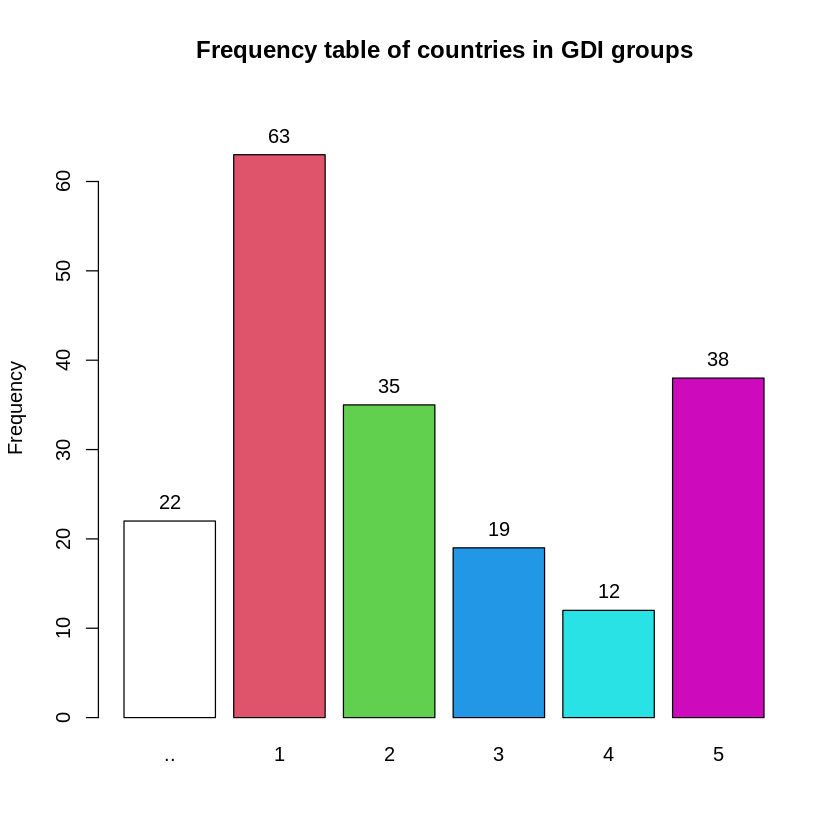

In [ ]:
tab1(Dane$GDI_Group, cum.percent = TRUE, main= "Frequency table of countries in GDI groups")

#Wartości statystyk opisowych

Państwa w zbiorze zostały posortowane według rankingu HDI. Wyresy przedstawiają zależność między tym rankingiem a wartością GDI (pierwszy wykres) oraz grupą GDI (drugi wykres). Można zauważyć, że między tymi wartościami nie ma jawnej zależności. Widać to szczególnie dobrze na drugim wykresie, na którym państwa zajmujące wysokie pozycje w rankingu, znajdują się w piątej grupie. Jednakże zasadnicza większość państw należących do grupy piątej została umieszczona na niskich pozycjach w rankingu HDI.

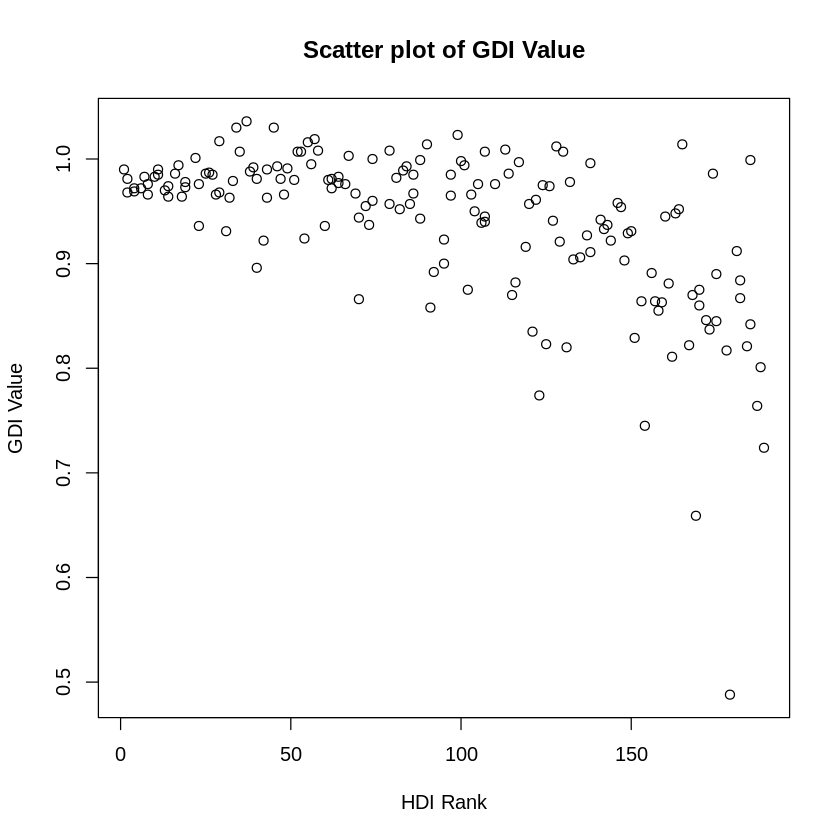

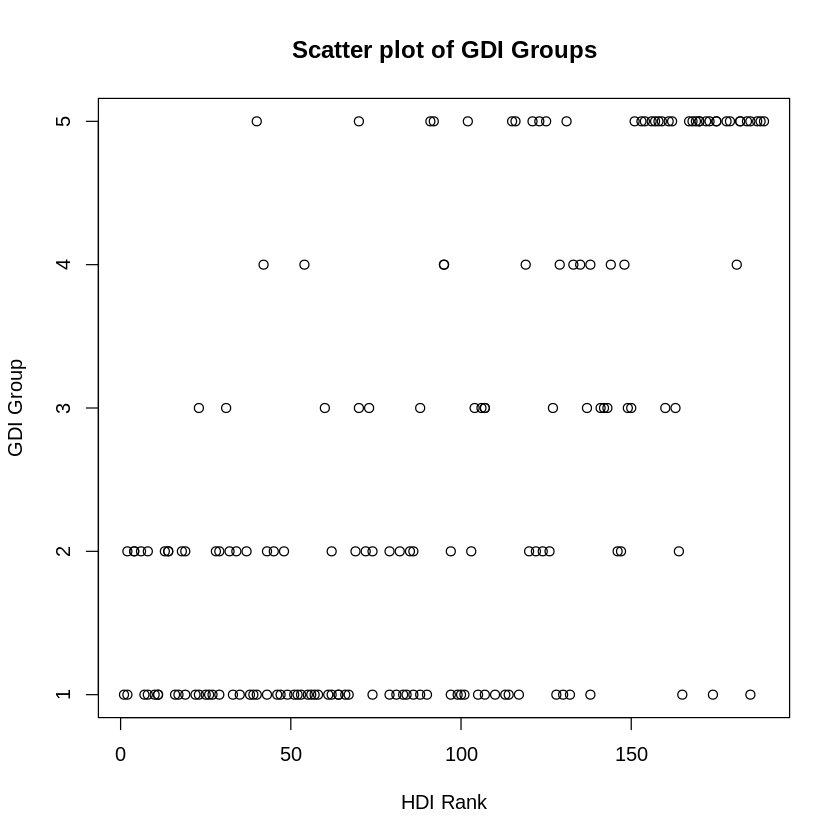

In [50]:
plot(Dane$HDI.Rank,as.numeric(Dane$GDI_Value), main="Scatter plot of GDI Value", xlab = "HDI Rank", ylab = "GDI Value")
plot(Dane$HDI.Rank, as.numeric(Dane$GDI_Group), main="Scatter plot of GDI Groups", xlab = "HDI Rank", ylab = "GDI Group")

Średnia wartość współczynnika GDI dla całego świata:  0.938994 
Mediana wartości współczynnika GDI:  0.965 
---------------------------
Średnia różnica spodziewanej długości życia kobiet i mężczyzn:  4.807104 
Wariancja różnicy długości życia:  4.23396 
Odchylenie standardowe:  2.057659 
Skośność zbioru:  0.7111499 , a więc zbiór jest  prawostronnie skośny
Kurtoza zbioru:  3.141836 


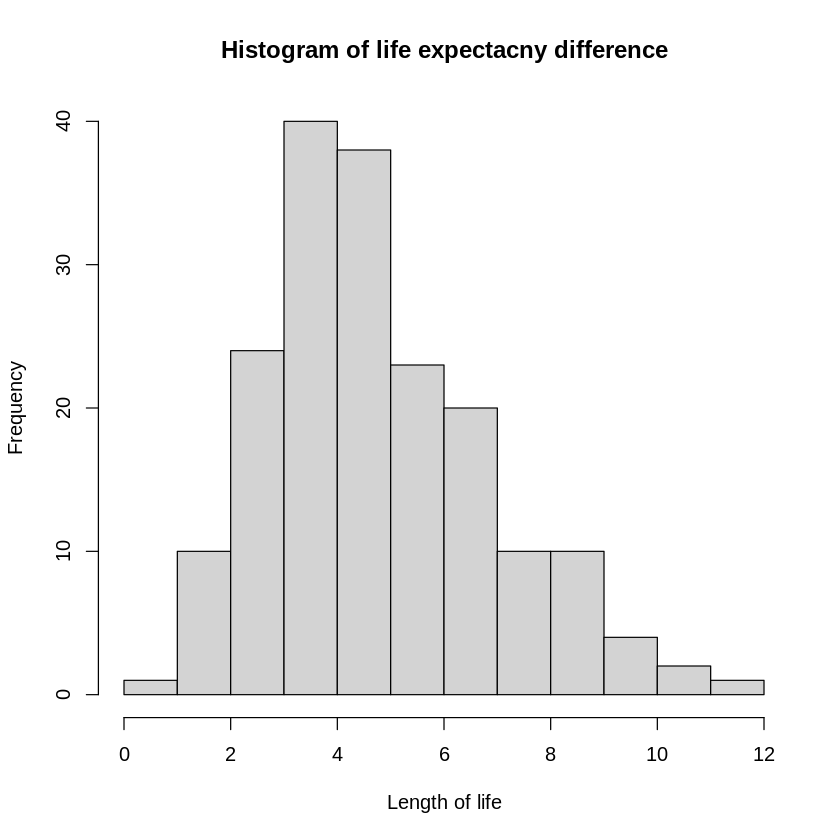

In [ ]:
#średnia wartość GDI dla świata
dat <- as.numeric(Dane$GDI_Value)
cat("Średnia wartość współczynnika GDI dla całego świata: ", mean(dat, na.rm=T), "\n")
cat("Mediana wartości współczynnika GDI: ", median(dat, na.rm = T), "\n")
cat("---------------------------\n")
dat <- as.numeric(Dane$Lif_Expec_Female) - as.numeric(Dane$Lif_Excep_Male)
cat("Średnia różnica spodziewanej długości życia kobiet i mężczyzn: ", mean(dat, na.rm=T), "\n")
cat("Wariancja różnicy długości życia: ", var(dat, na.rm=T), "\n")
cat("Odchylenie standardowe: ", sd(dat, na.rm=T), "\n")
hist(dat, main="Histogram of life expectacny difference",xlab = "Length of life")
sk <- skewness(dat, na.rm=T)
if(sk == 0){
    ans <- "symetryczny\n"
}else if(sk > 0){
    ans <- "prawostronnie skośny\n"
}else{
    ans <- "lewostronnie skośny\n"    
}
cat("Skośność zbioru: ", sk, ", a więc zbiór jest ", ans)
cat("Kurtoza zbioru: ", kurtosis(dat, na.rm=T), "\n")

Statystyki opisowe dotyczą dwóch aspektów. Średnia oraz mediana wartości GDI, plasująca się na poziomi około 0.95 oznacza całkiem dobry poziom życia kobiet, choć niewielką przewagę jakości poziomu życia mężczyzn.

Drugi aspekt dotyczy długości życia. Kobiety żyją statystycznie dłużej o około 4 lata. Rozkład różnic długości życia pokazano na histogramie.

#Test

Sprawdzamy, czy istnieje związek pomiędzy uśrednionym czasem nauki kobiet, a przychodem per capita (GNI_PC_FEMALE).

Hipoteza H0: korelacja nie zachodzi.

Hipoteza alternatywna H1: korelacja zachodzi.

In [ ]:
#clear data of NAs
x <- as.numeric(Dane$Mean_Yrs_Schooling_Female)
y <- as.numeric(gsub(",", "", Dane$GNI_PC_Female))
to_del <- unique(c(which(x %in% c(NA)), which(y %in% c(NA))))
x <- x[-to_del]
y <- y[-to_del]
alpha <- 0.05
eps <- 3

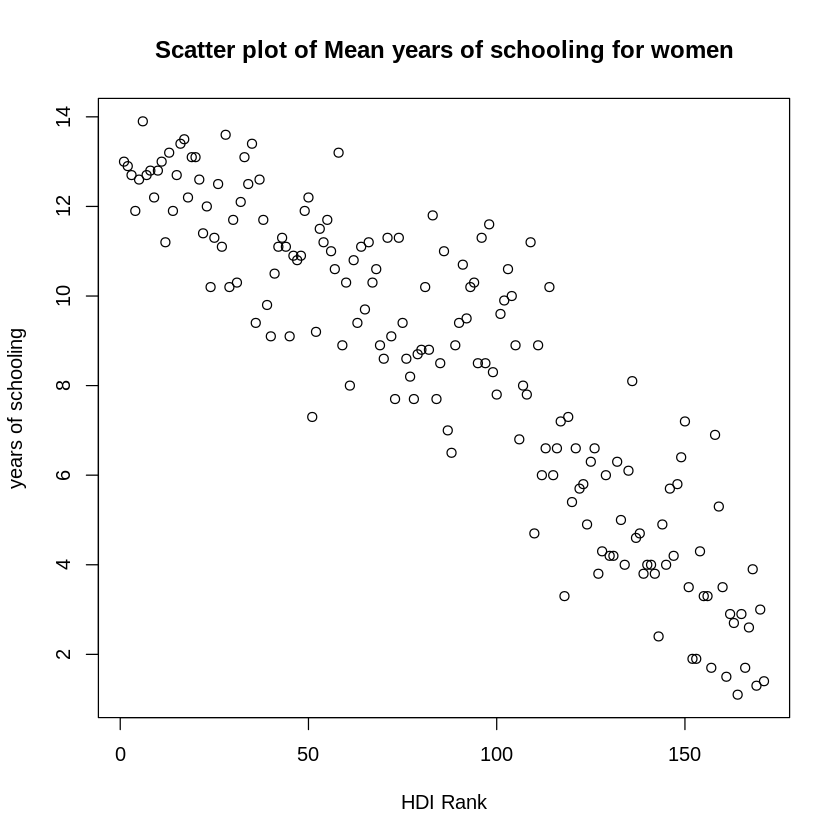

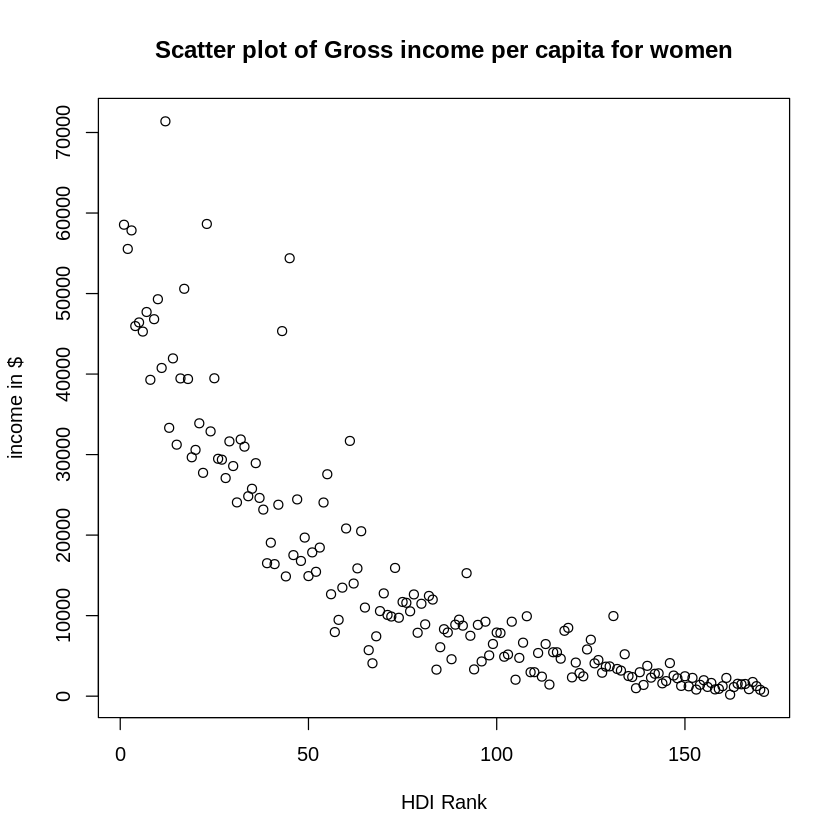

In [46]:
plot(x, main="Scatter plot of Mean years of schooling for women", xlab="HDI Rank", ylab = "years of schooling")
plot(y, main="Scatter plot of Gross income per capita for women" , xlab = "HDI Rank", ylab="income in $")

Na podstawie wykresów można ocenić, że między zestawianymi danymi zachodzi pewna zależność.

Do zbadania istotności korelacji między zmiennymi zastosowano test Z. Wybrana próba ma ponad 40 rekordów, pozwala zatem na zastosowanie tego typu testu. 

In [ ]:
prepare_model <- function(x, y){
    n <- length(x) #ilość danych w próbie
    mu_x <- mean(x) #średnie wartości danych 
    mu_y <- mean(y)
    s <- (x - mu_x)*(y - mu_y) #iloczyn odchyleń od średniej
    my_cov <- sum(s)/(length(s)-1) # kowariancja liczona jako suma odchyleń dzielona przez wielkość zbioru -1
    my_cor <- my_cov/(sd(x)*sd(y)) #korelacja liczone jako kowariacja dzielona przez iloczyn odchyleń standardowych
    Z <- my_cor/sqrt(1-my_cor^2) * sqrt(n) #wartość statystyki testowej
    Z_alpha <- round(qnorm(1-alpha/2),eps) #wartość krytyczna ograniczająca zbiór
    cat("\nWartosc statystyki testowej:", round(Z,eps))
    cat("\nWartość krytyczna:",Z_alpha)
    cat("\nKowariancja:", round(my_cov,eps))
    cat("\nKorelacja Pearsona:", round(my_cor,eps))
    cat("\nKorelacja Spearmana:", round(cor(y, x, method="spearman"),3), "\n") #dodatkowo wyliczona korelacja R Spearmana
    if(abs(Z) > abs(Z_alpha)){
        print("Korelacja istotna")
        print("Odrzucamy hipotezę zerową na rzecz hipotezy alternatywnej")
    }else{
        print("Korelacja nie zachodzi")
        print("Brak podstaw do odrzucenia H0")
    }
    plot(lm(y~x))
    return (Z > Z_alpha)
}


Wartosc statystyki testowej: 12.878
Wartość krytyczna: 1.96
Kowariancja: 37451.91
Korelacja Pearsona: 0.702
Korelacja Spearmana: 0.835 
[1] "Korelacja istotna"
[1] "Odrzucamy hipotezę zerową na rzecz hipotezy alternatywnej"


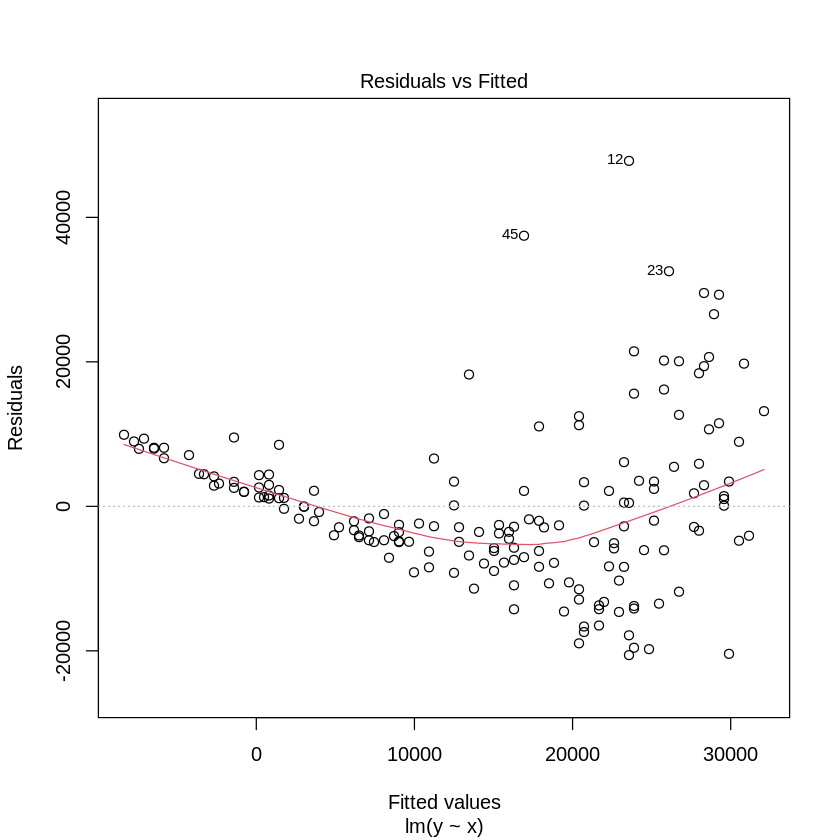

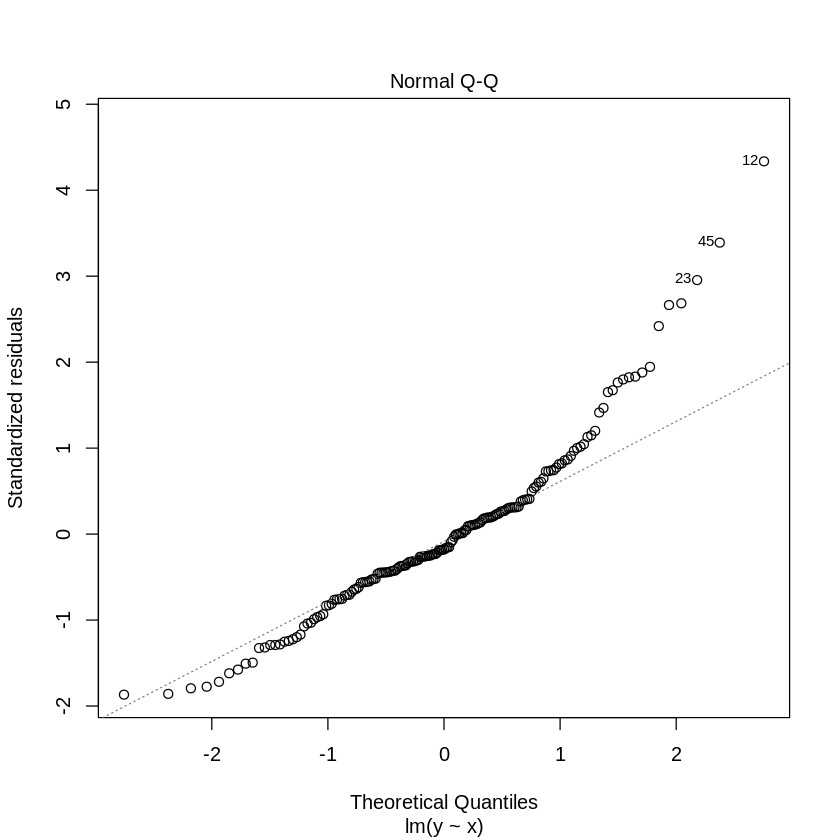

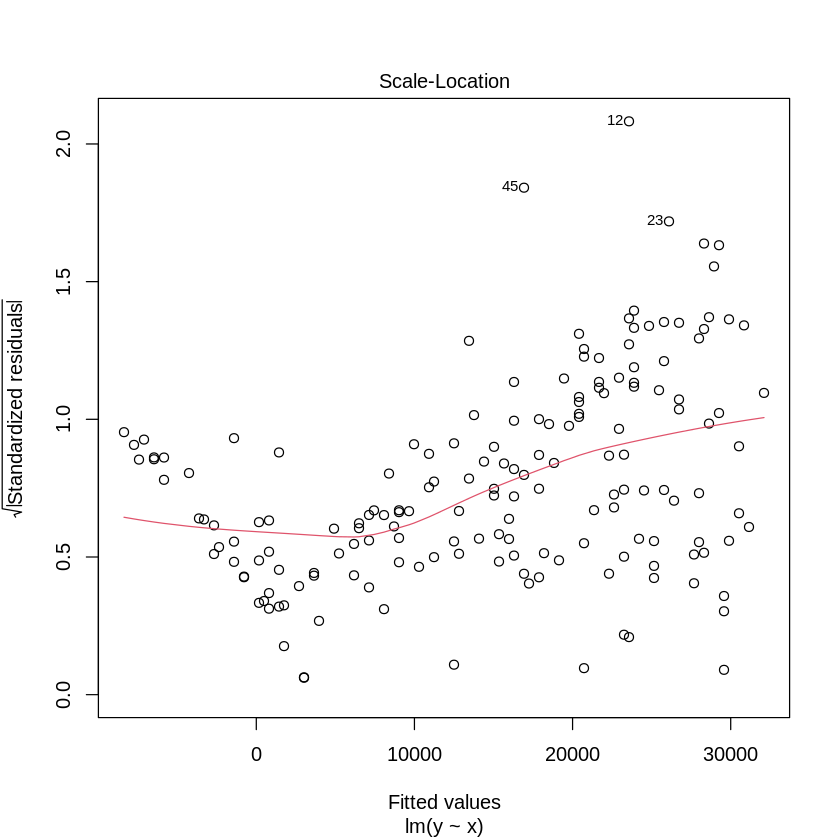

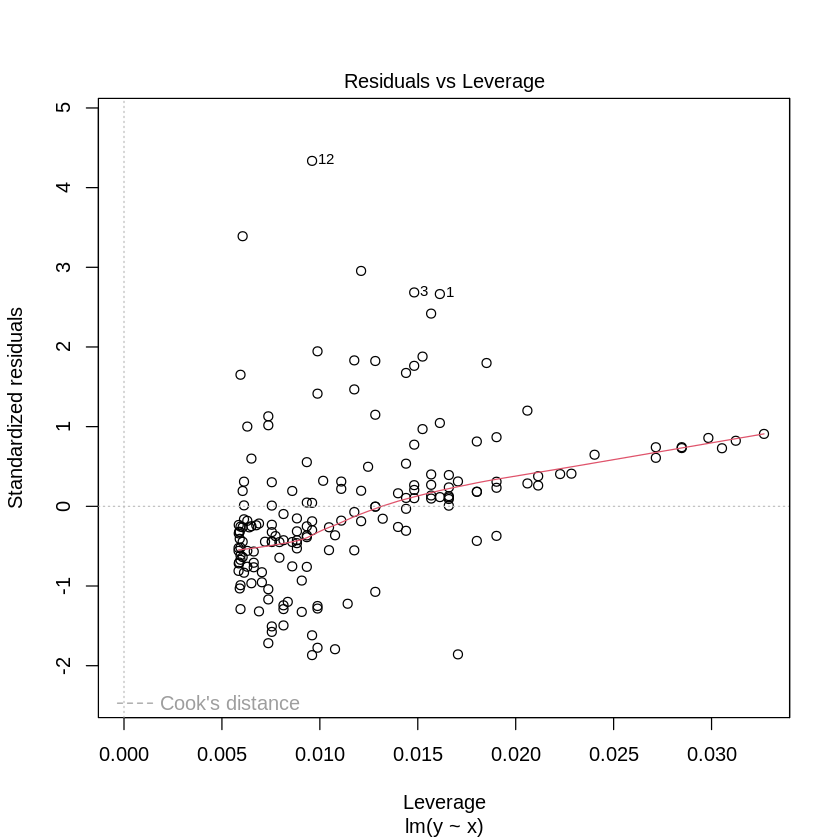

In [ ]:
#dla populacji
test <- prepare_model(x, y)

Rozmiar próby:  43 

Wartosc statystyki testowej: 7.671
Wartość krytyczna: 1.96
Kowariancja: 34865.69
Korelacja Pearsona: 0.76
Korelacja Spearmana: 0.846 
[1] "Korelacja istotna"
[1] "Odrzucamy hipotezę zerową na rzecz hipotezy alternatywnej"


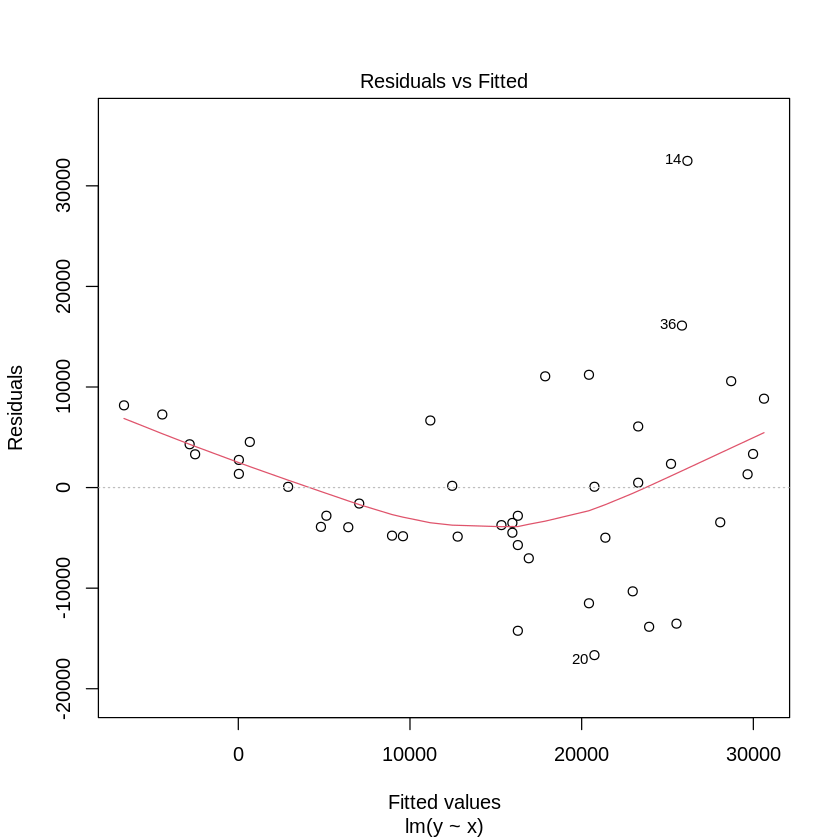

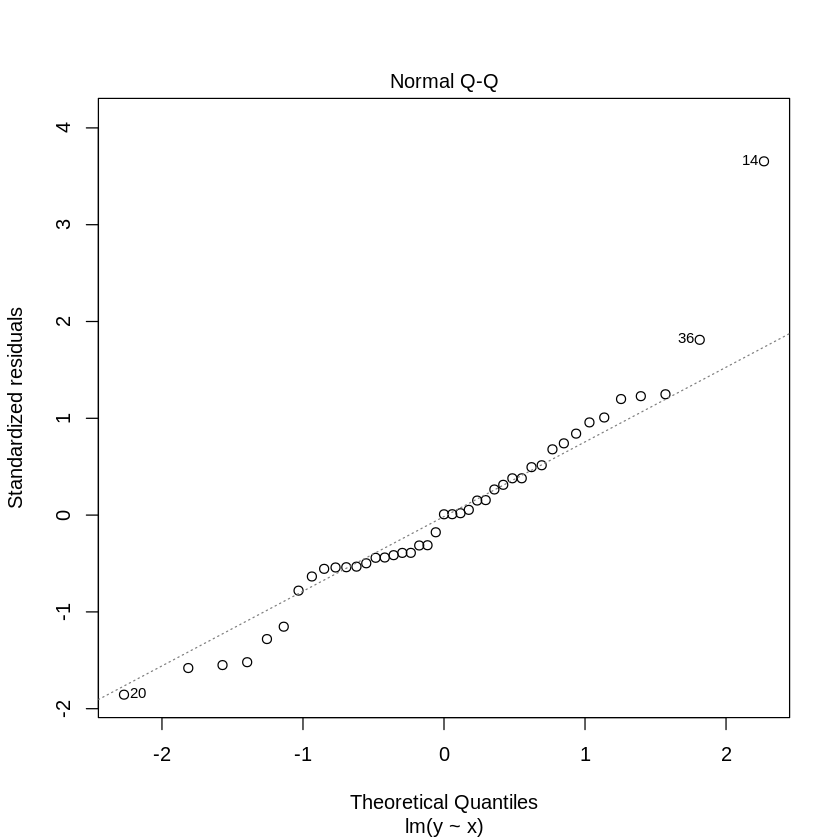

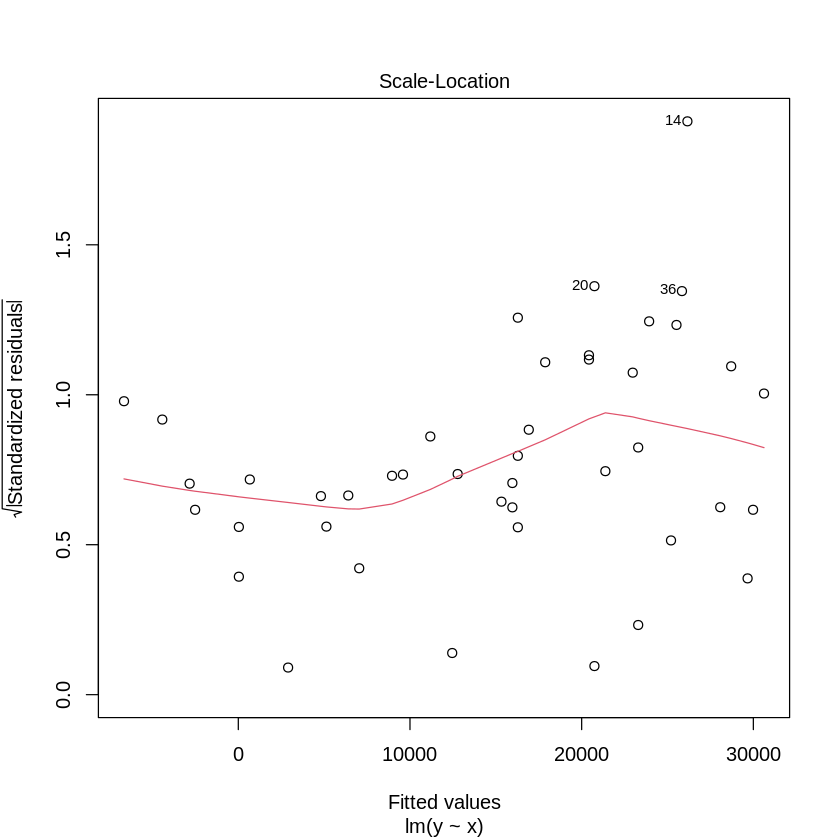

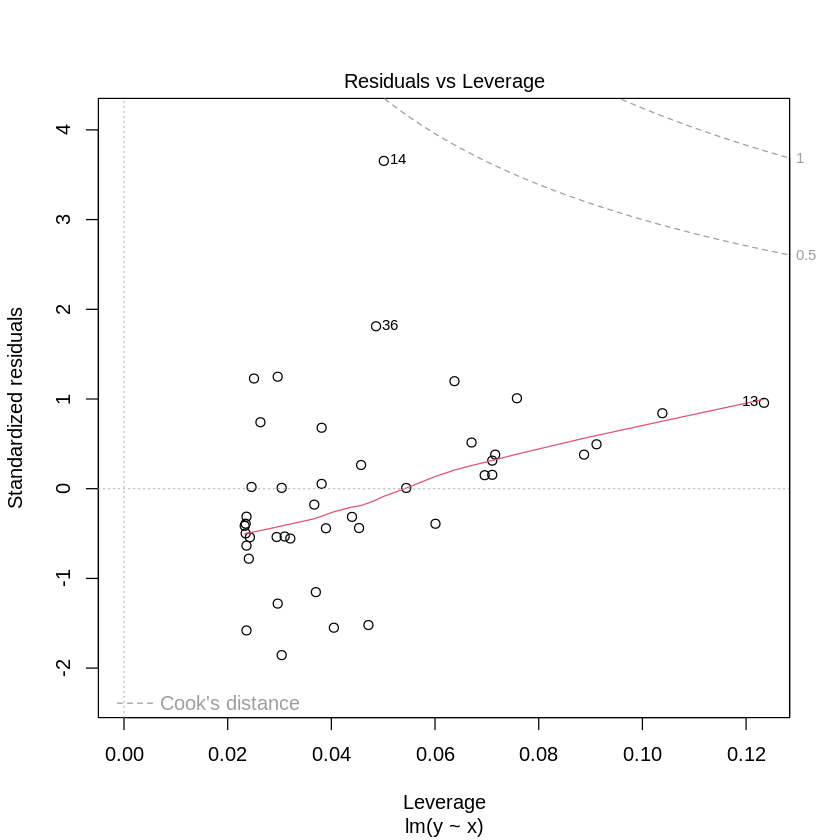

In [ ]:
#dla próby
sample_size <- round(length(x)/4)
cat("Rozmiar próby: ", sample_size, "\n")
ids<- sample(c(1:length(x)), size=sample_size, replace =F)
test2 <- prepare_model(x[ids], y[ids])

In [ ]:
if(test){
    if(!test2){
        print("Popełniono błąd drugiego rodzaju")
    }else{
        print("Nie popełniono błędu")
    }
}else{
    if(test2){
        print("Popełniono błąd pierwszego rodzaju")
    }
    else{
        print("Nie popełniono błędu")
    }
}

[1] "Nie popełniono błędu"


In [ ]:
options(warn = defaultW)

**Wnioski do testu**

Test potwierdził spodziewaną zależność. Mimo dużej kowariancji, między średnim czasem nauki a przychodem na osobę istnieje realna zależność. Potwierdzono to zarówno kożystając z korelacji Pearsona jak i z korelacji Spearmana. Dla losowo wybranej próby o rozmiarze $\frac{1}{4}$ populacji test również pokazał istnienie zależności. Nie popełniono zatem błędu ani pierwszego, ani drugiego rodzaju.

# Podsumowanie
* Zestaw danych wybrałem ze względu na jego istotne znaczenie dla ogólnego rozwoju światowego społeczeństwa. Państwa powinny dążyć do zmniejszania różnic poziomu życia między kobietami a mężczyznami. 
* W danych widać wyraźną różnicę między krajami o dominacji muzułmańskiej, w których to krajach kobiety mają wyraźnie niższy poziom życia i tym samym wiele z tych państw zostało zaliczone do grupy piątej.
* Zaskakujące jest, że niektóre państwa uznawane za słabo rozwinięte, posiadają bardzo wysoki współczynnik GDI. Do takich państw można zaliczyć chociażby Burundi czy Namibię.
* Jedna trzecia państw świata została zaklasyfikowana do pierwszej grupy. Wróży to dobrze na przyszłość, choć żeby uzyskać faktyczne dane dotyczące postępu w dziedzinie równości należałoby porównać te dane z danymi z innych lat.
* Ze względu na relane powiązanie między poziomem edukacji a przychodem krajowym, należałoby dążyć do wspierania i promocji edukacji, szczególnie w krajach słabiej rozwiniętych. Możliwe, że pomogłoby to poprawić ogólną sytuację tych państw.
* Przychód krajowy na osobę, która to wartość przekłada się na wynagrodzenie, zawiera bardzo duże różnice między kobietami a mężczyznami. W niektórych państwach mężczyźni zarabiają średnio prawie trzykrotnie więcej niż kobiety. Należy walczyć z takimi nierównościami i starać sie nie rozróżniać płci pracowników przy ustalaniu ich pensji.
* Należy zadbać o ty, by w następnych badaniach uwzględnić kraje, które w tym badaniu zostały pominięte.

Opracował Karol Wesołowski,
Poznan Univesity of Technology